In [1]:
import os
data_file_path = "data/"

dir_list = os.listdir(data_file_path)

In [2]:
dir_list_by_parameter = list(map(lambda x: x.split(":"), dir_list))

# dir_list_by_parameter[0]
# ['g_16000', 'p_10', 'wc_10', 'gs_42', 'ss_10', 'ipmutp_0.01', 'icmutp_0.005', 'icmaxsw_5', 'ccmutp_0.01.csv']

# extract unique numbers (ipmutp) and seeds
unique_ip_mut = set()
unique_seeds = set()
for i in range(len(dir_list_by_parameter)):
  unique_ip_mut.add(dir_list_by_parameter[i][5].split("_")[1])
  unique_seeds.add(dir_list_by_parameter[i][4].split("_")[1])

print(f"{len(unique_ip_mut)}, {len(unique_seeds)}")

15, 40


In [3]:
import pandas as pd

max_iters = 1500

fdf = pd.DataFrame()
for file in dir_list:
  ip_mut = float(file.split(":")[5].split("_")[1])
  seed = int(file.split(":")[4].split("_")[1])
  
  if seed not in [1]:
    continue
  
  df = pd.read_csv(f"{data_file_path}/{file}")
  df.rename(columns={'Unnamed: 0': 'generation'}, inplace=True)
  df['seed'] = [seed for _ in range(len(df))]
  df['ip_mut'] = [ip_mut for _ in range(len(df))]
  fdf = pd.concat((fdf, df[:max_iters]))

fdf.describe()

,generation,per_it_avg_total_length,per_it_avg_max_path_length,per_it_avg_fitness,per_it_best_fitness,seed,ip_mut
count,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.0,22500.000000
mean,749.500000,44272.200851,4191.129510,44272.200851,43324.351920,1.0,0.097067
std,433.022228,3514.308426,682.043887,3514.308426,3178.341904,0.0,0.093370
min,0.000000,38729.968908,2748.910243,38729.968908,38499.935910,1.0,0.001000
25%,374.750000,41299.439295,3769.121986,41299.439295,40774.500671,1.0,0.008000
50%,749.500000,43629.593161,4273.888654,43629.593161,42676.566404,1.0,0.080000
75%,1124.250000,46951.188625,4499.206870,46951.188625,45439.441706,1.0,0.160000
max,1499.000000,60015.116341,7684.054081,60015.116341,57327.245614,1.0,0.300000


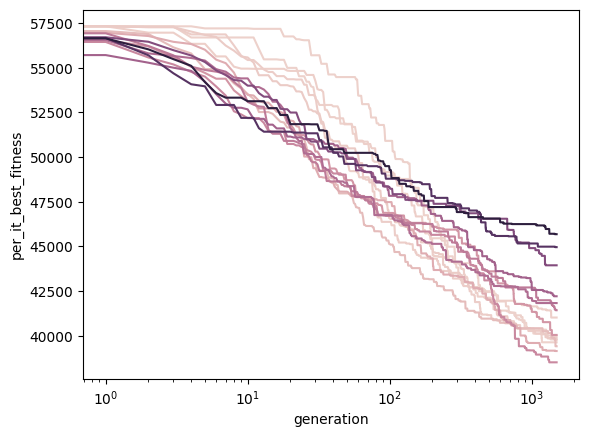

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.lineplot(data=fdf, x="generation", y="per_it_best_fitness", hue="ip_mut", legend=False)
ax.set(xscale="log")
plt.show()

fig = ax.get_figure()
fig.savefig("konvergencna_krivka.png") 


In [5]:
max_iters = 250

fdf2 = pd.DataFrame()
for file in dir_list:
  ip_mut = round(float(file.split(":")[5].split("_")[1]), 3)
  seed = int(file.split(":")[4].split("_")[1])
  
  if seed in [43]: # remove garbage
    continue
  
  df = pd.read_csv(f"{data_file_path}/{file}")
  df.rename(columns={'Unnamed: 0': 'generation'}, inplace=True)
  df['seed'] = [seed for _ in range(len(df))]
  df['ip_mut'] = [ip_mut for _ in range(len(df))]
  cdf = df[df['generation'] == max_iters]
  fdf2 = pd.concat((fdf2, cdf))

fdf2.describe()

,generation,per_it_avg_total_length,per_it_avg_max_path_length,per_it_avg_fitness,per_it_best_fitness,seed,ip_mut
count,600.0,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,250.0,45720.481214,4782.389858,45720.481214,44781.741468,20.500000,0.097067
std,0.0,2139.134843,1039.506378,2139.134843,1672.418310,11.553028,0.093446
min,250.0,40759.863838,2734.547226,40759.863838,40488.247063,1.000000,0.001000
25%,250.0,44156.770990,4085.608813,44156.770990,43618.127715,10.750000,0.008000
50%,250.0,45493.779033,4661.709371,45493.779033,44696.414947,20.500000,0.080000
75%,250.0,47071.915926,5434.563680,47071.915926,45823.903384,30.250000,0.160000
max,250.0,51862.413474,8501.708375,51862.413474,49025.254283,40.000000,0.300000


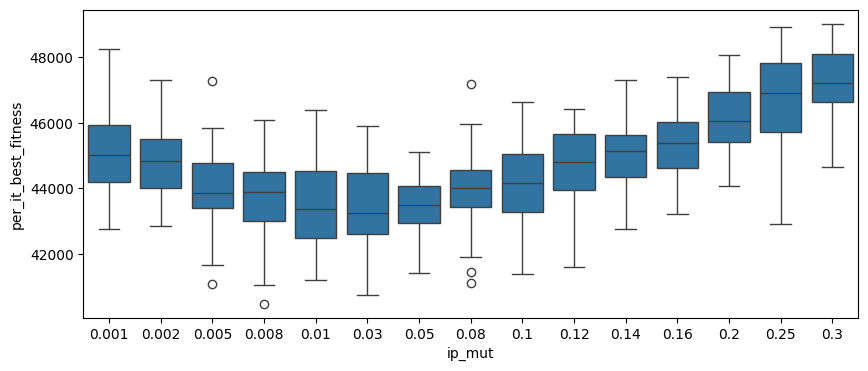

In [6]:
fig, ax = plt.subplots(figsize=(10, 4))
ax = sns.boxplot(ax=ax, data=fdf2, x="ip_mut", y="per_it_best_fitness")
plt.show()

fig = ax.get_figure()
fig.savefig("boxplot_middle.png") 

In [7]:
max_iters = 1499

fdf2 = pd.DataFrame()
for file in dir_list:
  ip_mut = round(float(file.split(":")[5].split("_")[1]), 3)
  seed = int(file.split(":")[4].split("_")[1])
  
  if seed in [43]: # remove garbage
    continue
  
  df = pd.read_csv(f"{data_file_path}/{file}")
  df.rename(columns={'Unnamed: 0': 'generation'}, inplace=True)
  df['seed'] = [seed for _ in range(len(df))]
  df['ip_mut'] = [ip_mut for _ in range(len(df))]
  cdf = df[df['generation'] == max_iters]
  fdf2 = pd.concat((fdf2, cdf))

fdf2.describe()

,generation,per_it_avg_total_length,per_it_avg_max_path_length,per_it_avg_fitness,per_it_best_fitness,seed,ip_mut
count,600.0,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,1499.0,42261.226495,4142.391090,42261.226495,41211.809936,20.500000,0.097067
std,0.0,3049.868858,983.991396,3049.868858,2364.358160,11.553028,0.093446
min,1499.0,36056.485061,2112.935328,36056.485061,36056.485061,1.000000,0.001000
25%,1499.0,39751.352460,3401.209471,39751.352460,39319.764354,10.750000,0.008000
50%,1499.0,41926.335051,4079.242627,41926.335051,40924.875324,20.500000,0.080000
75%,1499.0,44339.923326,4720.163686,44339.923326,42814.359334,30.250000,0.160000
max,1499.0,51065.716834,7869.295515,51065.716834,47400.402538,40.000000,0.300000


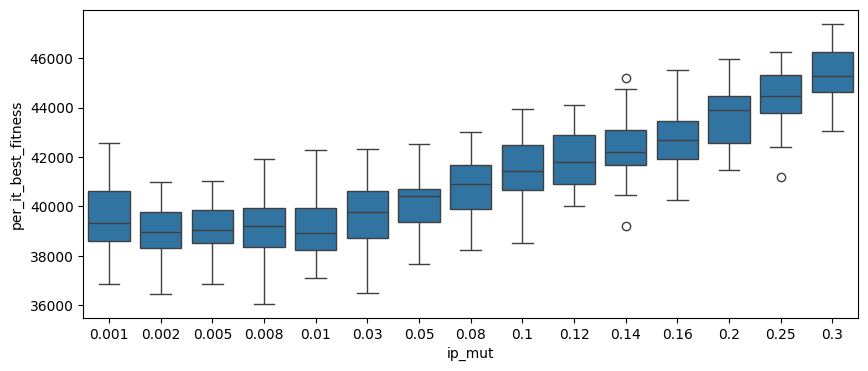

In [8]:
fig, ax = plt.subplots(figsize=(10, 4))
ax = sns.boxplot(ax=ax, data=fdf2, x="ip_mut", y="per_it_best_fitness")
plt.show()

fig = ax.get_figure()
fig.savefig("boxplot_end.png") 